In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from PIL import Image
import nibabel as nib
import os
import torch
import torch.nn as nn
import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms

In [2]:
#Load Dataset 2 
adc_images = []
dwi_images = []
masks = []
adc_dir = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_2/img/adc"
dwi_dir = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_2/img/dwi"
mask_dir = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_2/mask"

for filename in os.listdir(adc_dir):
    if filename.endswith(".gz"):
        adc_path = os.path.join(adc_dir, filename)
        adc_img = nib.load(adc_path).get_fdata()
        adc_images.append(adc_img)
for filename in os.listdir(dwi_dir):
    if filename.endswith(".gz"):
        dwi_path = os.path.join(dwi_dir, filename)
        dwi_img = nib.load(dwi_path).get_fdata()
        dwi_images.append(dwi_img)
for filename in os.listdir(mask_dir):
    if filename.endswith(".gz"):
        mask_path = os.path.join(mask_dir, filename)
        mask_img = nib.load(mask_path).get_fdata()
        masks.append(mask_img)

In [3]:
#Load Dataset 3
ds3_test_adc = []
ds3_train_adc = []
ds3_test_dwi = []
ds3_train_dwi = []
ds3_test_masks = []
ds3_train_masks = []
ds3_test_dir_adc = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/test/img/adc"
ds3_test_dir_dwi = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/test/img/dwi"
ds3_train_dir_adc = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/train/img/adc"
ds3_train_dir_dwi = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/train/img/dwi"
ds3_test_mask_dir = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/test/mask"
ds3_train_mask_dir = r"/home/pritamk/AIMIA/DS-261-AIMIA/AIMIA_Assignment_2/dataset_3/train/mask"
for filename in os.listdir(ds3_test_dir_adc):
    if filename.endswith(".gz"):
        adc_path = os.path.join(ds3_test_dir_adc, filename)
        adc_img = nib.load(adc_path).get_fdata()
        ds3_test_adc.append(adc_img)
for filename in os.listdir(ds3_train_dir_adc):
    if filename.endswith(".gz"):
        adc_path = os.path.join(ds3_train_dir_adc, filename)
        adc_img = nib.load(adc_path).get_fdata()
        ds3_train_adc.append(adc_img)
for filename in os.listdir(ds3_test_dir_dwi):
    if filename.endswith(".gz"):
        dwi_path = os.path.join(ds3_test_dir_dwi, filename)
        dwi_img = nib.load(dwi_path).get_fdata()
        ds3_test_dwi.append(dwi_img)
for filename in os.listdir(ds3_train_dir_dwi):
    if filename.endswith(".gz"):
        dwi_path = os.path.join(ds3_train_dir_dwi, filename)
        dwi_img = nib.load(dwi_path).get_fdata()
        ds3_train_dwi.append(dwi_img)
for filename in os.listdir(ds3_test_mask_dir):
    if filename.endswith(".gz"):
        mask_path = os.path.join(ds3_test_mask_dir, filename)
        mask_img = nib.load(mask_path).get_fdata()
        ds3_test_masks.append(mask_img)
for filename in os.listdir(ds3_train_mask_dir):
    if filename.endswith(".gz"):
        mask_path = os.path.join(ds3_train_mask_dir, filename)
        mask_img = nib.load(mask_path).get_fdata()
        ds3_train_masks.append(mask_img)

print(f"Shape of ADC images from Dataset 3: {np.array(ds3_train_adc).shape}")
print(f"Shape of DWI images from Dataset 3: {np.array(ds3_train_dwi).shape}")
print(f"Shape of Mask images from Dataset 3: {np.array(ds3_train_masks).shape}")
print(f"Shape of ADC images for testing from Dataset 3: {np.array(ds3_test_adc).shape}")
print(f"Shape of DWI images for testing from Dataset 3: {np.array(ds3_test_dwi).shape}")
print(f"Shape of Mask images for testing from Dataset 3: {np.array(ds3_test_masks).shape}")

Shape of ADC images from Dataset 3: (950, 64, 64)
Shape of DWI images from Dataset 3: (950, 64, 64)
Shape of Mask images from Dataset 3: (950, 64, 64)
Shape of ADC images for testing from Dataset 3: (407, 64, 64)
Shape of DWI images for testing from Dataset 3: (407, 64, 64)
Shape of Mask images for testing from Dataset 3: (407, 64, 64)


In [4]:
adc_images[0].shape, dwi_images[0].shape, masks[0].shape

((64, 64), (64, 64), (64, 64))

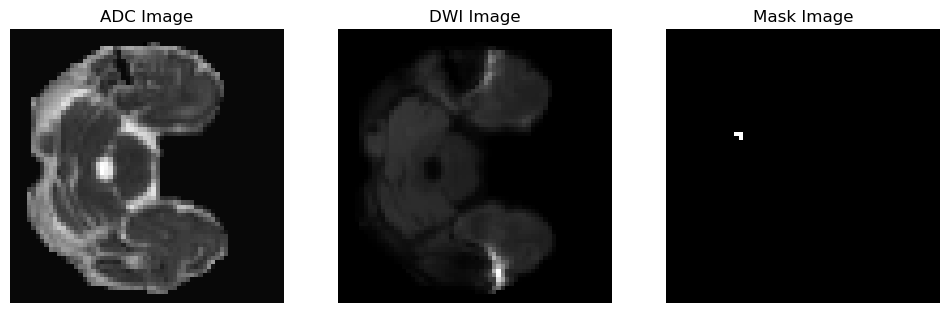

In [5]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(adc_images[0], cmap='gray')
plt.title('ADC Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dwi_images[0], cmap='gray')
plt.title('DWI Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(masks[0], cmap='gray')
plt.title('Mask Image')
plt.axis('off')
plt.show()

In [6]:
adc_images = np.array(adc_images)
dwi_images = np.array(dwi_images)
masks = np.array(masks)
print(adc_images.shape, dwi_images.shape, masks.shape)

(1504, 64, 64) (1504, 64, 64) (1504, 64, 64)


In [7]:
X = np.stack((adc_images, dwi_images), axis=0) # Combine ADC and DWI images. There are two channels in the training images
y = masks[np.newaxis, ...] # Add a new axis to masks to match the shape of X
print(X.shape, y.shape)

(2, 1504, 64, 64) (1, 1504, 64, 64)


In [8]:
#Combine adc and dwi images from dataset 3
ds3_train_images = np.stack((ds3_train_adc, ds3_train_dwi), axis=0)
ds3_test_images = np.stack((ds3_test_adc, ds3_test_dwi), axis=0)
ds3_train_masks = np.array(ds3_train_masks)[np.newaxis, ...]
ds3_test_masks = np.array(ds3_test_masks)[np.newaxis, ...]
ds3_train_images[np.isnan(ds3_train_images)] = 0 # Replace NaN values with 0
ds3_test_images[np.isnan(ds3_test_images)] = 0
print(ds3_train_images.shape, ds3_train_masks.shape)
print(ds3_test_images.shape, ds3_test_masks.shape)


(2, 950, 64, 64) (1, 950, 64, 64)
(2, 407, 64, 64) (1, 407, 64, 64)


In [9]:
import segmentation_models_pytorch as smp

/home/pritamk/miniconda3/envs/AIMIA/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def normalize_data(X, y):
    X_norm = np.zeros_like(X)
    for i in range(X.shape[0]):  # For two channels
        X_norm[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min() + 1e-8)
    
    y_norm = (y > 0).astype(np.float32)
    
    return X_norm, y_norm

X_normalized, y_normalized = normalize_data(X, y)
print(f"Normalized X range: [{X_normalized.min():.3f}, {X_normalized.max():.3f}]")
print(f"Normalized y range: [{y_normalized.min():.3f}, {y_normalized.max():.3f}]")
print(f"Unique values in masks: {np.unique(y_normalized, return_counts=True)}")


X_tensor = torch.FloatTensor(X_normalized).permute(1, 0, 2, 3)  # (samples, channels, H, W)
y_tensor = torch.FloatTensor(y_normalized).permute(1, 0, 2, 3)  # (samples, classes, H, W)

print(f"X tensor shape: {X_tensor.shape}")
print(f"y tensor shape: {y_tensor.shape}")

Normalized X range: [0.000, 1.000]
Normalized y range: [0.000, 1.000]
Unique values in masks: (array([0., 1.], dtype=float32), array([6082668,   77716]))
X tensor shape: torch.Size([1504, 2, 64, 64])
y tensor shape: torch.Size([1504, 1, 64, 64])


In [11]:
#Normalize datasets 3
ds3_train_images_normalized, ds3_train_masks_normalized = normalize_data(ds3_train_images, ds3_train_masks)
ds3_test_images_normalized, ds3_test_masks_normalized = normalize_data(ds3_test_images, ds3_test_masks)
ds3_train = torch.FloatTensor(ds3_train_images_normalized).permute(1, 0, 2, 3) # Has NaN values
ds3_train_masks = torch.FloatTensor(ds3_train_masks_normalized).permute(1, 0, 2, 3)
ds3_test = torch.FloatTensor(ds3_test_images_normalized).permute(1, 0, 2, 3) #Has NaN values
ds3_test_masks = torch.FloatTensor(ds3_test_masks_normalized).permute(1, 0, 2, 3)
print(f"DS3 Train tensor shape: {ds3_train.shape}")
print(f"DS3 masks tensor shape: {ds3_train_masks.shape}")
print(f"DS3 Test tensor shape: {ds3_test.shape}")
print(f"DS3 Test masks tensor shape: {ds3_test_masks.shape}")

DS3 Train tensor shape: torch.Size([950, 2, 64, 64])
DS3 masks tensor shape: torch.Size([950, 1, 64, 64])
DS3 Test tensor shape: torch.Size([407, 2, 64, 64])
DS3 Test masks tensor shape: torch.Size([407, 1, 64, 64])


In [12]:
train_loader = DataLoader(TensorDataset(X_tensor, y_tensor), batch_size=8, shuffle=True)
val_loader = DataLoader(TensorDataset(ds3_test, ds3_test_masks), batch_size=8, shuffle=False)
print(f"Train shape {X_tensor.shape}, labels shape {y_tensor.shape}")
print(f"Validation shape {ds3_test.shape}, labels shape {ds3_test_masks.shape}")
print(f"Number of batches in train loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")

Train shape torch.Size([1504, 2, 64, 64]), labels shape torch.Size([1504, 1, 64, 64])
Validation shape torch.Size([407, 2, 64, 64]), labels shape torch.Size([407, 1, 64, 64])
Number of batches in train loader: 188
Number of batches in validation loader: 51


In [13]:
def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred) # Element-wise multiplication and sum. If y_true and y_pred are binary masks, this gives the number of pixels that are predicted as positive and are actually positive.
    total = np.sum(y_true) + np.sum(y_pred) # total number of positive pixels in both masks
    if total == 0:
        return 1.0  
    return 2. * intersection / total


from scipy import ndimage
from skimage.measure import label

def lesion_wise_accuracy(y_true, y_pred):
    true_labeled, true_num_lesions = label(y_true, return_num=True)
    pred_labeled, pred_num_lesions = label(y_pred, return_num=True)
    
    if true_num_lesions == 0 and pred_num_lesions == 0:
        return 1.0  # Perfect if both have no lesions
    
    if true_num_lesions == 0 or pred_num_lesions == 0:
        return 0.0  # One has lesions, other doesn't
    
    # Count overlapping lesions
    true_positive = 0
    
    for true_lesion_id in range(1, true_num_lesions + 1):
        true_lesion_mask = (true_labeled == true_lesion_id)
        
        overlapping_pred_labels = np.unique(pred_labeled[true_lesion_mask]) # Check if any predicted lesion overlaps with this true lesion
        overlapping_pred_labels = overlapping_pred_labels[overlapping_pred_labels != 0]
        
        if len(overlapping_pred_labels) > 0:
             
            for pred_label in overlapping_pred_labels: # Check if the overlap is significant
                pred_lesion_mask = (pred_labeled == pred_label)
                intersection = np.sum(true_lesion_mask & pred_lesion_mask)
                true_lesion_size = np.sum(true_lesion_mask)
                
                if intersection / true_lesion_size > 0.5:  
                    true_positive += 1
                    break
    
    # Calculate metrics
    false_negative = true_num_lesions - true_positive
    false_positive = pred_num_lesions - true_positive
    
    if true_positive + false_negative == 0:
        sensitivity = 1.0
    else:
        sensitivity = true_positive / (true_positive + false_negative)
    
    if true_positive + false_positive == 0:
        precision = 1.0
    else:
        precision = true_positive / (true_positive + false_positive)
    
    if precision + sensitivity == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    
    return f1


In [16]:
def trainer_class(model, train_loader, test_loader, criterion, optimizer, num_epochs, device, patience_counter, scheduler=None):
    training_losses = []
    validation_losses = []
    best_val_loss = float('inf')
    train_dice_scores = []
    valid_dice_scores = []
    patience = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_dice_total = 0.0
        num_train_batches = 0
        
        for batch_idx, (images, masks) in enumerate(tqdm.tqdm(train_loader, desc=f"Train Epoch {epoch+1}/{num_epochs}")):
            images, masks = images.to(device, dtype=torch.float32), masks.to(device, dtype=torch.float32)
            optimizer.zero_grad()
            
            outputs = model(images)  # logits 
            loss = criterion(outputs, masks)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            # FIX: Apply sigmoid before thresholding for dice calculation
            with torch.no_grad():
                preds = (torch.sigmoid(outputs) > 0.5).float()
                batch_dice = dice_score(masks.cpu().numpy(), preds.cpu().numpy())
                train_dice_total += batch_dice
            
            train_loss += loss.item() * images.size(0)
            num_train_batches += 1
        
        epoch_train_loss = train_loss / len(train_loader.dataset)
        training_losses.append(epoch_train_loss)
        epoch_dice_score = train_dice_total / num_train_batches
        train_dice_scores.append(epoch_dice_score)
        
        # Validation
        model.eval()
        validation_loss = 0.0
        val_dice_total = 0.0
        num_val_batches = 0
        
        with torch.no_grad():
            for images, masks in tqdm.tqdm(test_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
                images, masks = images.to(device, dtype=torch.float32), masks.to(device, dtype=torch.float32)
                outputs = model(images)
                loss = criterion(outputs, masks)
                validation_loss += loss.item() * images.size(0)
                
                preds = (torch.sigmoid(outputs) > 0.5).float()
                batch_dice = dice_score(masks.cpu().numpy(), preds.cpu().numpy())
                val_dice_total += batch_dice
                num_val_batches += 1
        
        epoch_val_loss = validation_loss / len(test_loader.dataset)
        validation_losses.append(epoch_val_loss)
        epoch_dice_score_val = val_dice_total / num_val_batches
        valid_dice_scores.append(epoch_dice_score_val)
        
        print("*"*50)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")
        print(f"Epoch {epoch+1}/{num_epochs}, Train Dice Score: {epoch_dice_score:.4f}, Val Dice Score: {epoch_dice_score_val:.4f}")
        print("*"*50)
        
        # ENABLE early stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience = 0
            # Save best model
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience += 1
            if patience >= patience_counter:
                print("Early stopping triggered")
                break
                
        if scheduler:
            scheduler.step(epoch_val_loss)
    
    return training_losses, validation_losses, train_dice_scores, valid_dice_scores

In [14]:
class CombinedLoss(nn.Module):
    def __init__(self, alpha=0.3):
        super().__init__()
        self.alpha = alpha
        self.bce = nn.BCEWithLogitsLoss()
    
    def dice_loss(self, pred, target, smooth=1):
        pred = torch.sigmoid(pred)
        pred = pred.view(-1)
        target = target.view(-1)
        intersection = (pred * target).sum()
        dice = (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)
        return 1 - dice
    
    def forward(self, pred, target):
        bce_loss = self.bce(pred, target)
        dice_loss = self.dice_loss(pred, target)
        return bce_loss +  dice_loss

In [16]:
model1 = smp.Unet(encoder_name="resnet34",encoder_weights="imagenet",in_channels=2,classes=1)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1.to(DEVICE)
parameters_count = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print(f"Number of trainable parameters in the model: {parameters_count}")

Number of trainable parameters in the model: 24433233


In [17]:
criterion = CombinedLoss(alpha=0.7)
optimizer = torch.optim.AdamW(model1.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-6)

In [19]:
training_losses, validation_losses, train_dice_scores, valid_dice_scores = trainer_class(model1, train_loader, val_loader, criterion, optimizer, num_epochs=50, device=DEVICE, patience_counter=10, scheduler=scheduler)

Train Epoch 1/50:   0%|          | 0/188 [00:00<?, ?it/s]

Validation Epoch 1/50: 100%|██████████| 51/51 [00:00<00:00, 171.43it/s]


**************************************************
Epoch 1/50, Train Loss: 1.2323, Val Loss: 1.1577
Epoch 1/50, Train Dice Score: 0.2074, Val Dice Score: 0.0323
**************************************************


/home/pritamk/miniconda3/envs/AIMIA/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:204: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Validation Epoch 2/50: 100%|██████████| 51/51 [00:00<00:00, 191.56it/s]


**************************************************
Epoch 2/50, Train Loss: 0.9625, Val Loss: 1.1180
Epoch 2/50, Train Dice Score: 0.4237, Val Dice Score: 0.0607
**************************************************


Validation Epoch 3/50: 100%|██████████| 51/51 [00:00<00:00, 191.13it/s]


**************************************************
Epoch 3/50, Train Loss: 0.7899, Val Loss: 1.0522
Epoch 3/50, Train Dice Score: 0.5332, Val Dice Score: 0.0691
**************************************************


Validation Epoch 4/50: 100%|██████████| 51/51 [00:00<00:00, 190.82it/s]


**************************************************
Epoch 4/50, Train Loss: 0.6352, Val Loss: 0.9919
Epoch 4/50, Train Dice Score: 0.6001, Val Dice Score: 0.0997
**************************************************


Validation Epoch 5/50: 100%|██████████| 51/51 [00:00<00:00, 190.06it/s]


**************************************************
Epoch 5/50, Train Loss: 0.5348, Val Loss: 1.0336
Epoch 5/50, Train Dice Score: 0.6269, Val Dice Score: 0.0897
**************************************************


Validation Epoch 6/50: 100%|██████████| 51/51 [00:00<00:00, 191.72it/s]


**************************************************
Epoch 6/50, Train Loss: 0.4482, Val Loss: 1.0808
Epoch 6/50, Train Dice Score: 0.6741, Val Dice Score: 0.0842
**************************************************


Validation Epoch 7/50: 100%|██████████| 51/51 [00:00<00:00, 189.89it/s]


**************************************************
Epoch 7/50, Train Loss: 0.3966, Val Loss: 1.0988
Epoch 7/50, Train Dice Score: 0.6925, Val Dice Score: 0.0819
**************************************************


Validation Epoch 8/50: 100%|██████████| 51/51 [00:00<00:00, 192.45it/s]


**************************************************
Epoch 8/50, Train Loss: 0.3673, Val Loss: 1.0684
Epoch 8/50, Train Dice Score: 0.7059, Val Dice Score: 0.0776
**************************************************


Validation Epoch 9/50: 100%|██████████| 51/51 [00:00<00:00, 189.99it/s]


**************************************************
Epoch 9/50, Train Loss: 0.3338, Val Loss: 1.1345
Epoch 9/50, Train Dice Score: 0.7273, Val Dice Score: 0.0704
**************************************************


Validation Epoch 10/50: 100%|██████████| 51/51 [00:00<00:00, 192.45it/s]


**************************************************
Epoch 10/50, Train Loss: 0.3002, Val Loss: 1.0238
Epoch 10/50, Train Dice Score: 0.7546, Val Dice Score: 0.0954
**************************************************


Validation Epoch 11/50: 100%|██████████| 51/51 [00:00<00:00, 190.54it/s]


**************************************************
Epoch 11/50, Train Loss: 0.2938, Val Loss: 1.0408
Epoch 11/50, Train Dice Score: 0.7561, Val Dice Score: 0.0956
**************************************************


Validation Epoch 12/50: 100%|██████████| 51/51 [00:00<00:00, 191.38it/s]


**************************************************
Epoch 12/50, Train Loss: 0.2743, Val Loss: 1.0524
Epoch 12/50, Train Dice Score: 0.7708, Val Dice Score: 0.0942
**************************************************


Validation Epoch 13/50: 100%|██████████| 51/51 [00:00<00:00, 190.90it/s]


**************************************************
Epoch 13/50, Train Loss: 0.2480, Val Loss: 1.0516
Epoch 13/50, Train Dice Score: 0.7919, Val Dice Score: 0.0933
**************************************************


Validation Epoch 14/50: 100%|██████████| 51/51 [00:00<00:00, 190.72it/s]

**************************************************
Epoch 14/50, Train Loss: 0.2317, Val Loss: 1.0407
Epoch 14/50, Train Dice Score: 0.8045, Val Dice Score: 0.1002
**************************************************
Early stopping triggered


In [28]:
class plotGraphs:
    def __init__(self, title):
        self.title = title

    def plot_losses(self, training_losses, validation_losses):    
        plt.figure(figsize=(8, 5))
        plt.plot(training_losses, label='Training Loss', color='blue', marker ='o')
        plt.plot(validation_losses, label='Validation Loss', color='orange', marker ='s')
        plt.title(self.title)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()
    def plot_metrics(self, train_dice_scores, valid_dice_scores):    
        plt.figure(figsize=(8, 5))
        plt.plot(train_dice_scores, label='Training Dice Score', color='blue', marker ='o')
        plt.plot(valid_dice_scores, label='Validation Dice Score', color='red', marker ='s')
        plt.title(self.title)
        plt.xlabel('Epochs')
        plt.ylabel('Dice Score')
        plt.legend()
        plt.grid()
        plt.show()


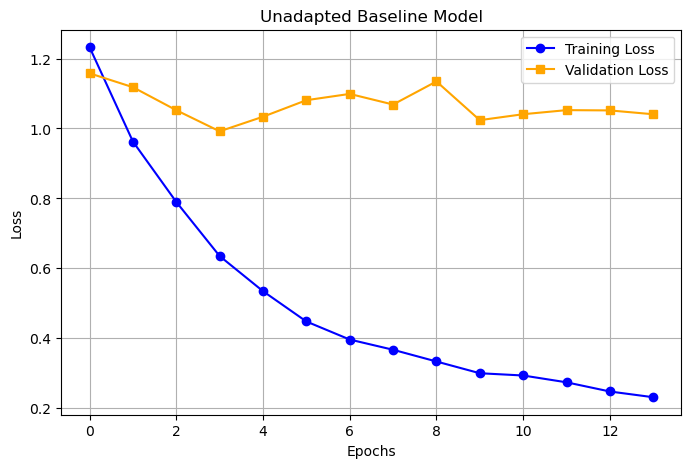

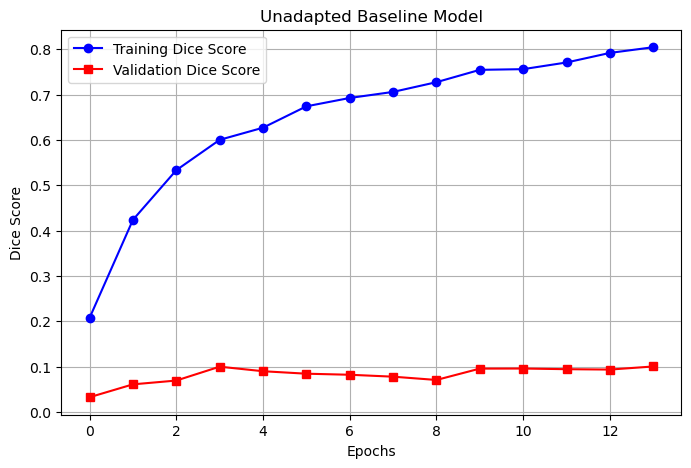

In [24]:
plotGraphs("Unadapted Baseline Model").plot_losses(training_losses, validation_losses)
plotGraphs("Unadapted Baseline Model").plot_metrics(train_dice_scores, valid_dice_scores)

In [32]:
def evaluate(model, test_loader, device, threshold, supervised=False):
	model.eval()
	preds, labels = [], []

	with torch.no_grad():
		if supervised:
			for img, label, _ in test_loader:
				img = img.to(device, dtype=torch.float32)
				label = label.to(device, dtype=torch.float32)

				segmentation_output, _ = model(img)  # Unpack both outputs, use only segmentation
				output = torch.sigmoid(segmentation_output) 

				preds.append(output.cpu())
				labels.append(label.cpu())
		else:
			for img, label in test_loader:
				img = img.to(device, dtype=torch.float32)
				label = label.to(device, dtype=torch.float32)
				
				segmentation_output, _ = model(img)  # Unpack both outputs, use only segmentation
				output = torch.sigmoid(segmentation_output)  # convert logits → probability

				preds.append(output.cpu())
				labels.append(label.cpu())

	# Concatenate all batches
	preds = torch.cat(preds, dim=0)         
	labels = torch.cat(labels, dim=0)       

	# Binarize predictions
	binary_preds = (preds >= threshold).float()

	return binary_preds, labels

In [ ]:
best_dice = 0
best_lesion_acc = 0
threshold = 0.5
for threshold in [0.3,0.4,0.5,0.6, 0.7]:
    outputs, labels = evaluate(model1, val_loader, device='cuda', threshold=threshold)
    outputs = outputs.squeeze(1)
    labels = labels.squeeze(1)
    outputs = outputs.numpy()
    labels = labels.numpy()
    if dice_score(labels, outputs) > best_dice:
        best_dice = dice_score(labels, outputs)
        threshold = threshold
    if lesion_wise_accuracy(labels, outputs) > best_lesion_acc:
        best_lesion_acc = lesion_wise_accuracy(labels, outputs)
        threshold = threshold

print(f"Threshold {threshold} dice score {best_dice:.4f}")
print(f"Threshold {threshold} lesion-wise accuracy {best_lesion_acc:.4f}")

Threshold 0.7 dice score 0.6670
Threshold 0.7 lesion-wise accuracy 0.4780


In [ ]:
class plotSamples:
	def __init__(self, model, val_loader, device, threshold, supervised=False):
		self.model = model
		self.val_loader = val_loader
		self.device = device
		self.threshold = threshold
		self.supervised = supervised

	def get_items(self):
		# Get original images from the validation loader
		if self.supervised:
			# For supervised DA, we need to get the original images
			val_images = self.val_loader.dataset.tensors[0].numpy()  # Images
			test_masks = self.val_loader.dataset.tensors[1].numpy()  # Ground truth masks
		else:
			val_images = self.val_loader.dataset.tensors[0].numpy()
			test_masks = self.val_loader.dataset.tensors[1].numpy()
		
		outputs, labels = evaluate(self.model, self.val_loader, device=self.device, threshold=self.threshold, supervised=self.supervised)
		outputs = outputs.squeeze(1).numpy()
		labels = labels.squeeze(1).numpy()
		
		dice_scores = [dice_score(labels[i], outputs[i]) for i in range(len(labels))]
		sorted_indices = np.argsort(dice_scores)
		
		# Get indices excluding perfect scores
		best_dice_scores = [(dice_scores[i], i) for i in sorted_indices if dice_scores[i] != 1.0]
		worst_dice_scores = [(dice_scores[i], i) for i in sorted_indices]
		
		if len(best_dice_scores) >= 2:
			best_indices = [idx for score, idx in best_dice_scores[-2:]]
		else:
			best_indices = [idx for score, idx in sorted_indices[-2:]]
		
		worst_indices = [idx for score, idx in worst_dice_scores[:2]]
		
		two_best_masks_ground_truth = test_masks[best_indices]
		two_worst_masks_ground_truth = test_masks[worst_indices]
		two_best_masks_predictions = outputs[best_indices]
		two_worst_masks_predictions = outputs[worst_indices]
		
		return two_best_masks_ground_truth, two_best_masks_predictions, two_worst_masks_ground_truth, two_worst_masks_predictions
	
	def plot_samples(self):
		best_masks_gt, best_masks_pred, worst_masks_gt, worst_masks_pred = self.get_items()
		
		for i in range(min(2, len(best_masks_gt))):
			plt.figure(figsize=(10, 5))
			plt.subplot(1, 2, 1)
			# Handle different tensor dimensions
			if len(best_masks_gt[i].shape) == 3:
				plt.imshow(best_masks_gt[i][0], cmap='gray')
			else:
				plt.imshow(best_masks_gt[i], cmap='gray')
			plt.title(f'Best Mask Ground Truth {i+1}')
			plt.axis('off')
			
			plt.subplot(1, 2, 2)
			plt.imshow(best_masks_pred[i], cmap='gray')
			plt.title(f'Best Mask Prediction {i+1}')
			plt.axis('off')
			plt.show()
		
		for i in range(min(2, len(worst_masks_gt))):
			plt.figure(figsize=(10, 5))
			plt.subplot(1, 2, 1)
			if len(worst_masks_gt[i].shape) == 3:
				plt.imshow(worst_masks_gt[i][0], cmap='gray')
			else:
				plt.imshow(worst_masks_gt[i], cmap='gray')
			plt.title(f'Worst Mask Ground Truth {i+1}')
			plt.axis('off')
			
			plt.subplot(1, 2, 2)
			plt.imshow(worst_masks_pred[i], cmap='gray')
			plt.title(f'Worst Mask Prediction {i+1}')
			plt.axis('off') 
			plt.show()


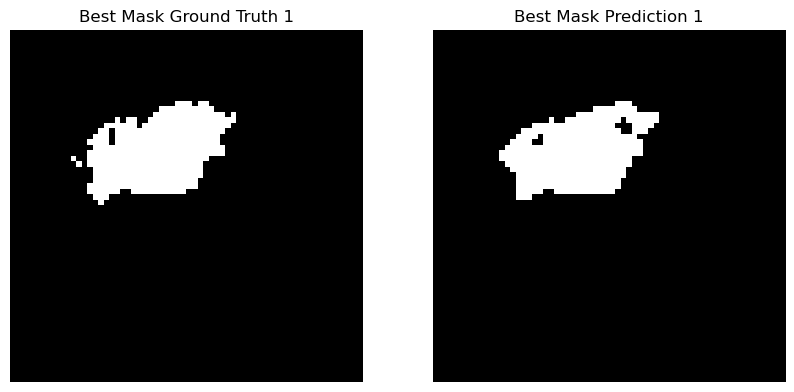

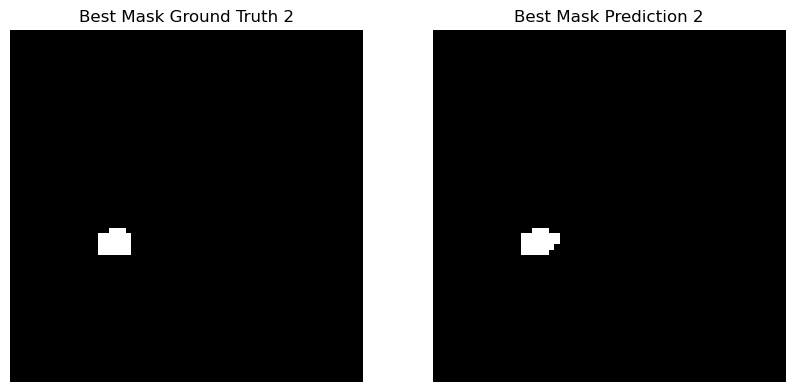

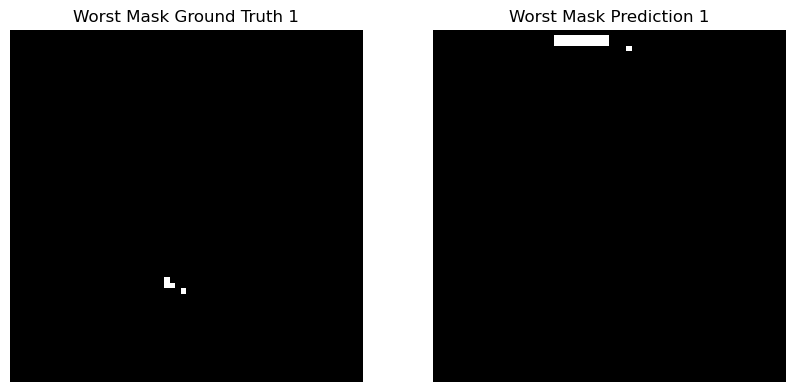

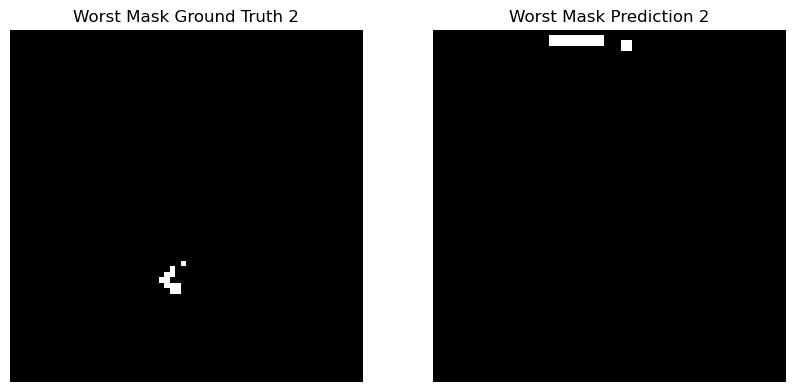

In [67]:
plotSamples(model1, val_loader, device='cuda', threshold=threshold).plot_samples()

### b

In [21]:
combined_train_images = torch.cat((X_tensor, ds3_train), dim=0)
combined_train_masks = torch.cat((y_tensor, ds3_train_masks), dim=0)
ds2_domain_labels = torch.zeros(X_tensor.shape[0], 1) # Domain 0
ds3_domain_labels = torch.ones(ds3_train.shape[0], 1) # Domain 1
combined_domain_labels = torch.cat((ds2_domain_labels, ds3_domain_labels), dim=0)
supervised_da_train_dataset = TensorDataset(combined_train_images, combined_train_masks, combined_domain_labels)
supervised_da_train_loader = DataLoader(supervised_da_train_dataset, batch_size=32, shuffle=True)
ds3_test_domain_labels = torch.ones(ds3_test.shape[0], 1) # Domain 1 for target set
supervised_da_val_dataset = TensorDataset(ds3_test, ds3_test_masks, ds3_test_domain_labels)
supervised_da_val_loader = DataLoader(supervised_da_val_dataset, batch_size=32, shuffle=False)

print(f"Combined training images shape: {combined_train_images.shape}")
print(f"Combined training masks shape: {combined_train_masks.shape}")
print(f"Supervised DA train loader size: {len(supervised_da_train_loader)}") #Number of batches in the training loader
print(f"Supervised DA validation loader size: {len(supervised_da_val_loader)}") #Number of batches in the validation loader

Combined training images shape: torch.Size([2454, 2, 64, 64])
Combined training masks shape: torch.Size([2454, 1, 64, 64])
Supervised DA train loader size: 77
Supervised DA validation loader size: 13


In [22]:
class GradientReversalLayer(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambda_):
        ctx.lambda_ = lambda_
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return -ctx.lambda_ * grad_output, None

In [23]:
class DomainAdaptationModel(nn.Module):
    def __init__(self, segmentation_model, grl_lambda=1.0):
        super(DomainAdaptationModel, self).__init__()
        self.segmentation_model = segmentation_model
        self.grl_lambda = grl_lambda

        self.domain_classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(True),
            nn.Dropout(0.4),
            nn.Linear(256, 1)
        )

    def forward(self, x):
        encoder_features = self.segmentation_model.encoder(x)[-1]
        segmentation_output = self.segmentation_model(x)

        reversed_features = GradientReversalLayer.apply(encoder_features, self.grl_lambda)
        domain_output = self.domain_classifier(reversed_features)

        return segmentation_output, domain_output


In [24]:
def supervised_da_trainer(model, train_loader, val_loader, segmentation_criterion,
                          domain_criterion, optimizer, num_epochs, device,
                          patience_counter, domain_loss_weight=0.1, scheduler=None):

    training_losses = []
    validation_losses = []
    train_dice_scores = []
    valid_dice_scores = []

    best_val_loss = float('inf')
    patience = 0

    for epoch in range(num_epochs):
        model.train()
        epoch_seg_loss, epoch_domain_loss, epoch_total_loss = 0, 0, 0
        epoch_dice = 0
        num_train_samples = 0

        for images, masks, domain_labels in tqdm.tqdm(train_loader, desc=f"Train Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device, dtype=torch.float32)
            masks = masks.to(device, dtype=torch.float32)
            domain_labels = domain_labels.to(device, dtype=torch.float32)

            optimizer.zero_grad()

            segmentation_output, domain_output = model(images) # Get both segmentation and domain outputs(logits)

            seg_loss = segmentation_criterion(segmentation_output, masks)
            d_loss  = domain_criterion(domain_output, domain_labels)

            total_loss = seg_loss + domain_loss_weight * d_loss
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            # Add to epoch totals
            epoch_seg_loss += seg_loss.item() * images.size(0)
            epoch_domain_loss += d_loss.item() * images.size(0)
            epoch_total_loss += total_loss.item() * images.size(0) #images.size(0) is the batch size
            num_train_samples += images.size(0) # Add number of samples in the batch

            preds = (torch.sigmoid(segmentation_output) > 0.5).float()
            epoch_dice += dice_score(masks.cpu().numpy(), preds.cpu().numpy())

        # Epoch averages
        epoch_seg_loss /= num_train_samples
        epoch_domain_loss /= num_train_samples
        epoch_total_loss /= num_train_samples
        epoch_dice /= len(train_loader)

        training_losses.append(epoch_total_loss)
        train_dice_scores.append(epoch_dice)

        # Validation 
        model.eval()
        val_seg_loss = 0
        val_dice = 0
        num_val_samples = 0

        with torch.no_grad():
            for images, masks, _ in tqdm.tqdm(val_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
                images = images.to(device, dtype=torch.float32)
                masks = masks.to(device, dtype=torch.float32)

                segmentation_output, _ = model(images) # Ignore domain output during validation

                seg_loss = segmentation_criterion(segmentation_output, masks)
                val_seg_loss += seg_loss.item() * images.size(0)

                preds = (torch.sigmoid(segmentation_output) > 0.5).float()
                val_dice += dice_score(masks.cpu().numpy(), preds.cpu().numpy())

                num_val_samples += images.size(0)

        val_seg_loss /= num_val_samples
        validation_losses.append(val_seg_loss)
        val_dice /= len(val_loader)
        valid_dice_scores.append(val_dice)

        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {epoch_total_loss:.4f} | Seg: {epoch_seg_loss:.4f} | Domain: {epoch_domain_loss:.4f}")
        print(f"Val Seg Loss: {val_seg_loss:.4f}")
        print(f"Train Dice: {epoch_dice:.4f} | Val Dice: {val_dice:.4f}\n")

        # Early stopping
        if val_seg_loss < best_val_loss:
            best_val_loss = val_seg_loss
            patience = 0
        else:
            patience += 1
            if patience >= patience_counter:
                print("Early stopping triggered.")
                break

        if scheduler:
            scheduler.step(val_seg_loss)

    return training_losses, validation_losses, train_dice_scores, valid_dice_scores


In [25]:
segmentation_criterion = criterion #Segmentation loss. Using combined loss
domain_criterion = nn.BCEWithLogitsLoss() #Domain loss. Requires logits as input.
domain_adaptation_model = DomainAdaptationModel(model1, grl_lambda=0.1)
domain_adaptation_model.to(DEVICE)
optimizer_da = torch.optim.Adam(domain_adaptation_model.parameters(), lr=5e-5, weight_decay=1e-5)
scheduler_da = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_da, mode='min', factor=0.5, patience=3)

In [26]:
supervised_da_training_losses, supervised_da_validation_losses, supervised_da_train_dice_scores, supervised_da_valid_dice_scores = supervised_da_trainer(
                                                        domain_adaptation_model,
                                                        supervised_da_train_loader,
                                                        supervised_da_val_loader,
                                                        segmentation_criterion,
                                                        domain_criterion,
                                                        optimizer_da,
                                                        num_epochs=50, 
                                                        device=DEVICE,
                                                        patience_counter=10,
                                                        domain_loss_weight=0.5, 
                                                        scheduler=scheduler_da)

Validation Epoch 1/50: 100%|██████████| 13/13 [00:00<00:00, 85.03it/s] 



Epoch 1/50
Train Loss: 1.6926 | Seg: 1.2708 | Domain: 0.8436
Val Seg Loss: 1.2450
Train Dice: 0.0575 | Val Dice: 0.0243



Validation Epoch 2/50: 100%|██████████| 13/13 [00:00<00:00, 102.69it/s]



Epoch 2/50
Train Loss: 1.5718 | Seg: 1.1566 | Domain: 0.8303
Val Seg Loss: 1.1634
Train Dice: 0.2018 | Val Dice: 0.0796



Validation Epoch 3/50: 100%|██████████| 13/13 [00:00<00:00, 101.92it/s]



Epoch 3/50
Train Loss: 1.5788 | Seg: 1.0761 | Domain: 1.0055
Val Seg Loss: 1.1109
Train Dice: 0.3911 | Val Dice: 0.0920



Validation Epoch 4/50: 100%|██████████| 13/13 [00:00<00:00, 101.40it/s]



Epoch 4/50
Train Loss: 1.4419 | Seg: 1.0139 | Domain: 0.8561
Val Seg Loss: 1.0966
Train Dice: 0.4459 | Val Dice: 0.1817



Validation Epoch 5/50: 100%|██████████| 13/13 [00:00<00:00, 103.27it/s]



Epoch 5/50
Train Loss: 1.3748 | Seg: 0.9550 | Domain: 0.8397
Val Seg Loss: 1.0306
Train Dice: 0.4838 | Val Dice: 0.2032



Validation Epoch 6/50: 100%|██████████| 13/13 [00:00<00:00, 102.13it/s]



Epoch 6/50
Train Loss: 1.2860 | Seg: 0.8886 | Domain: 0.7948
Val Seg Loss: 0.9813
Train Dice: 0.5384 | Val Dice: 0.2497



Validation Epoch 7/50: 100%|██████████| 13/13 [00:00<00:00, 102.20it/s]



Epoch 7/50
Train Loss: 1.2054 | Seg: 0.8210 | Domain: 0.7689
Val Seg Loss: 0.9309
Train Dice: 0.5802 | Val Dice: 0.3480



Validation Epoch 8/50: 100%|██████████| 13/13 [00:00<00:00, 103.51it/s]



Epoch 8/50
Train Loss: 1.1325 | Seg: 0.7561 | Domain: 0.7528
Val Seg Loss: 0.8608
Train Dice: 0.6125 | Val Dice: 0.4401



Validation Epoch 9/50: 100%|██████████| 13/13 [00:00<00:00, 101.89it/s]



Epoch 9/50
Train Loss: 1.0469 | Seg: 0.6917 | Domain: 0.7105
Val Seg Loss: 0.8349
Train Dice: 0.6405 | Val Dice: 0.4062



Validation Epoch 10/50: 100%|██████████| 13/13 [00:00<00:00, 101.62it/s]



Epoch 10/50
Train Loss: 0.9947 | Seg: 0.6320 | Domain: 0.7254
Val Seg Loss: 0.7918
Train Dice: 0.6622 | Val Dice: 0.4213



Validation Epoch 11/50: 100%|██████████| 13/13 [00:00<00:00, 102.44it/s]



Epoch 11/50
Train Loss: 0.9334 | Seg: 0.5720 | Domain: 0.7228
Val Seg Loss: 0.6995
Train Dice: 0.6906 | Val Dice: 0.5220



Validation Epoch 12/50: 100%|██████████| 13/13 [00:00<00:00, 102.57it/s]



Epoch 12/50
Train Loss: 0.8697 | Seg: 0.5168 | Domain: 0.7058
Val Seg Loss: 0.7191
Train Dice: 0.7103 | Val Dice: 0.4583



Validation Epoch 13/50: 100%|██████████| 13/13 [00:00<00:00, 103.00it/s]



Epoch 13/50
Train Loss: 0.8200 | Seg: 0.4691 | Domain: 0.7019
Val Seg Loss: 0.6494
Train Dice: 0.7264 | Val Dice: 0.5150



Validation Epoch 14/50: 100%|██████████| 13/13 [00:00<00:00, 101.71it/s]



Epoch 14/50
Train Loss: 0.7862 | Seg: 0.4370 | Domain: 0.6985
Val Seg Loss: 0.6080
Train Dice: 0.7345 | Val Dice: 0.5450



Validation Epoch 15/50: 100%|██████████| 13/13 [00:00<00:00, 98.02it/s]



Epoch 15/50
Train Loss: 0.7472 | Seg: 0.4029 | Domain: 0.6886
Val Seg Loss: 0.5884
Train Dice: 0.7464 | Val Dice: 0.5477



Validation Epoch 16/50: 100%|██████████| 13/13 [00:00<00:00, 98.71it/s]



Epoch 16/50
Train Loss: 0.7297 | Seg: 0.3688 | Domain: 0.7218
Val Seg Loss: 0.5684
Train Dice: 0.7640 | Val Dice: 0.5578



Validation Epoch 17/50: 100%|██████████| 13/13 [00:00<00:00, 99.68it/s] 



Epoch 17/50
Train Loss: 0.6932 | Seg: 0.3464 | Domain: 0.6938
Val Seg Loss: 0.5635
Train Dice: 0.7706 | Val Dice: 0.5507



Validation Epoch 18/50: 100%|██████████| 13/13 [00:00<00:00, 103.48it/s]



Epoch 18/50
Train Loss: 0.6843 | Seg: 0.3285 | Domain: 0.7116
Val Seg Loss: 0.5653
Train Dice: 0.7769 | Val Dice: 0.5379



Validation Epoch 19/50: 100%|██████████| 13/13 [00:00<00:00, 100.92it/s]



Epoch 19/50
Train Loss: 0.6657 | Seg: 0.3080 | Domain: 0.7155
Val Seg Loss: 0.5385
Train Dice: 0.7863 | Val Dice: 0.5596



Validation Epoch 20/50: 100%|██████████| 13/13 [00:00<00:00, 101.06it/s]



Epoch 20/50
Train Loss: 0.6440 | Seg: 0.2935 | Domain: 0.7010
Val Seg Loss: 0.5420
Train Dice: 0.7924 | Val Dice: 0.5450



Validation Epoch 21/50: 100%|██████████| 13/13 [00:00<00:00, 104.58it/s]



Epoch 21/50
Train Loss: 0.6334 | Seg: 0.2808 | Domain: 0.7053
Val Seg Loss: 0.5060
Train Dice: 0.7986 | Val Dice: 0.5774



Validation Epoch 22/50: 100%|██████████| 13/13 [00:00<00:00, 101.95it/s]



Epoch 22/50
Train Loss: 0.6220 | Seg: 0.2714 | Domain: 0.7011
Val Seg Loss: 0.5073
Train Dice: 0.8024 | Val Dice: 0.5662



Validation Epoch 23/50: 100%|██████████| 13/13 [00:00<00:00, 103.48it/s]



Epoch 23/50
Train Loss: 0.6105 | Seg: 0.2579 | Domain: 0.7052
Val Seg Loss: 0.4952
Train Dice: 0.8085 | Val Dice: 0.5780



Validation Epoch 24/50: 100%|██████████| 13/13 [00:00<00:00, 102.41it/s]



Epoch 24/50
Train Loss: 0.6067 | Seg: 0.2520 | Domain: 0.7093
Val Seg Loss: 0.5296
Train Dice: 0.8116 | Val Dice: 0.5459



Validation Epoch 25/50: 100%|██████████| 13/13 [00:00<00:00, 100.83it/s]



Epoch 25/50
Train Loss: 0.5918 | Seg: 0.2408 | Domain: 0.7020
Val Seg Loss: 0.4664
Train Dice: 0.8175 | Val Dice: 0.6041



Validation Epoch 26/50: 100%|██████████| 13/13 [00:00<00:00, 100.44it/s]



Epoch 26/50
Train Loss: 0.5915 | Seg: 0.2350 | Domain: 0.7129
Val Seg Loss: 0.5069
Train Dice: 0.8207 | Val Dice: 0.5555



Validation Epoch 27/50: 100%|██████████| 13/13 [00:00<00:00, 102.50it/s]



Epoch 27/50
Train Loss: 0.5716 | Seg: 0.2241 | Domain: 0.6951
Val Seg Loss: 0.4941
Train Dice: 0.8284 | Val Dice: 0.5699



Validation Epoch 28/50: 100%|██████████| 13/13 [00:00<00:00, 103.39it/s]



Epoch 28/50
Train Loss: 0.5777 | Seg: 0.2234 | Domain: 0.7086
Val Seg Loss: 0.4968
Train Dice: 0.8269 | Val Dice: 0.5634



Validation Epoch 29/50: 100%|██████████| 13/13 [00:00<00:00, 101.66it/s]



Epoch 29/50
Train Loss: 0.5604 | Seg: 0.2197 | Domain: 0.6814
Val Seg Loss: 0.4661
Train Dice: 0.8287 | Val Dice: 0.5962



Validation Epoch 30/50: 100%|██████████| 13/13 [00:00<00:00, 103.77it/s]



Epoch 30/50
Train Loss: 0.5807 | Seg: 0.2148 | Domain: 0.7318
Val Seg Loss: 0.4798
Train Dice: 0.8314 | Val Dice: 0.5797



Validation Epoch 31/50: 100%|██████████| 13/13 [00:00<00:00, 103.56it/s]



Epoch 31/50
Train Loss: 0.5614 | Seg: 0.2084 | Domain: 0.7061
Val Seg Loss: 0.4729
Train Dice: 0.8359 | Val Dice: 0.5860



Validation Epoch 32/50: 100%|██████████| 13/13 [00:00<00:00, 103.02it/s]



Epoch 32/50
Train Loss: 0.5498 | Seg: 0.2051 | Domain: 0.6894
Val Seg Loss: 0.4819
Train Dice: 0.8374 | Val Dice: 0.5733



Validation Epoch 33/50: 100%|██████████| 13/13 [00:00<00:00, 104.12it/s]



Epoch 33/50
Train Loss: 0.5586 | Seg: 0.2024 | Domain: 0.7126
Val Seg Loss: 0.4777
Train Dice: 0.8397 | Val Dice: 0.5794



Validation Epoch 34/50: 100%|██████████| 13/13 [00:00<00:00, 101.99it/s]



Epoch 34/50
Train Loss: 0.5449 | Seg: 0.1910 | Domain: 0.7077
Val Seg Loss: 0.4715
Train Dice: 0.8491 | Val Dice: 0.5843



Validation Epoch 35/50: 100%|██████████| 13/13 [00:00<00:00, 102.22it/s]



Epoch 35/50
Train Loss: 0.5300 | Seg: 0.1872 | Domain: 0.6856
Val Seg Loss: 0.4662
Train Dice: 0.8523 | Val Dice: 0.5907



Validation Epoch 36/50: 100%|██████████| 13/13 [00:00<00:00, 102.75it/s]



Epoch 36/50
Train Loss: 0.5339 | Seg: 0.1835 | Domain: 0.7007
Val Seg Loss: 0.4654
Train Dice: 0.8558 | Val Dice: 0.5891



Validation Epoch 37/50: 100%|██████████| 13/13 [00:00<00:00, 102.59it/s]



Epoch 37/50
Train Loss: 0.5287 | Seg: 0.1752 | Domain: 0.7069
Val Seg Loss: 0.4688
Train Dice: 0.8625 | Val Dice: 0.5849



Validation Epoch 38/50: 100%|██████████| 13/13 [00:00<00:00, 102.10it/s]



Epoch 38/50
Train Loss: 0.5314 | Seg: 0.1815 | Domain: 0.6998
Val Seg Loss: 0.4700
Train Dice: 0.8564 | Val Dice: 0.5868



Validation Epoch 39/50: 100%|██████████| 13/13 [00:00<00:00, 102.02it/s]



Epoch 39/50
Train Loss: 0.5270 | Seg: 0.1782 | Domain: 0.6975
Val Seg Loss: 0.4617
Train Dice: 0.8587 | Val Dice: 0.5890



Validation Epoch 40/50: 100%|██████████| 13/13 [00:00<00:00, 102.07it/s]



Epoch 40/50
Train Loss: 0.5324 | Seg: 0.1777 | Domain: 0.7093
Val Seg Loss: 0.4719
Train Dice: 0.8591 | Val Dice: 0.5770



Validation Epoch 41/50: 100%|██████████| 13/13 [00:00<00:00, 103.98it/s]



Epoch 41/50
Train Loss: 0.5269 | Seg: 0.1710 | Domain: 0.7119
Val Seg Loss: 0.4749
Train Dice: 0.8650 | Val Dice: 0.5771



Validation Epoch 42/50: 100%|██████████| 13/13 [00:00<00:00, 101.43it/s]



Epoch 42/50
Train Loss: 0.5149 | Seg: 0.1692 | Domain: 0.6914
Val Seg Loss: 0.4547
Train Dice: 0.8661 | Val Dice: 0.5950



Validation Epoch 43/50: 100%|██████████| 13/13 [00:00<00:00, 103.98it/s]



Epoch 43/50
Train Loss: 0.5122 | Seg: 0.1670 | Domain: 0.6904
Val Seg Loss: 0.4537
Train Dice: 0.8679 | Val Dice: 0.5978



Validation Epoch 44/50: 100%|██████████| 13/13 [00:00<00:00, 101.67it/s]



Epoch 44/50
Train Loss: 0.5159 | Seg: 0.1666 | Domain: 0.6985
Val Seg Loss: 0.4607
Train Dice: 0.8682 | Val Dice: 0.5910



Validation Epoch 45/50: 100%|██████████| 13/13 [00:00<00:00, 104.17it/s]



Epoch 45/50
Train Loss: 0.5137 | Seg: 0.1652 | Domain: 0.6969
Val Seg Loss: 0.4595
Train Dice: 0.8694 | Val Dice: 0.5915



Validation Epoch 46/50: 100%|██████████| 13/13 [00:00<00:00, 102.71it/s]



Epoch 46/50
Train Loss: 0.5178 | Seg: 0.1645 | Domain: 0.7065
Val Seg Loss: 0.4598
Train Dice: 0.8688 | Val Dice: 0.5907



Validation Epoch 47/50: 100%|██████████| 13/13 [00:00<00:00, 102.03it/s]



Epoch 47/50
Train Loss: 0.5072 | Seg: 0.1563 | Domain: 0.7017
Val Seg Loss: 0.4536
Train Dice: 0.8761 | Val Dice: 0.5987



Validation Epoch 48/50: 100%|██████████| 13/13 [00:00<00:00, 99.17it/s]



Epoch 48/50
Train Loss: 0.5074 | Seg: 0.1587 | Domain: 0.6974
Val Seg Loss: 0.4693
Train Dice: 0.8739 | Val Dice: 0.5830



Validation Epoch 49/50: 100%|██████████| 13/13 [00:00<00:00, 98.61it/s]



Epoch 49/50
Train Loss: 0.5112 | Seg: 0.1635 | Domain: 0.6953
Val Seg Loss: 0.4675
Train Dice: 0.8682 | Val Dice: 0.5841



Validation Epoch 50/50: 100%|██████████| 13/13 [00:00<00:00, 96.62it/s]


Epoch 50/50
Train Loss: 0.5001 | Seg: 0.1559 | Domain: 0.6886
Val Seg Loss: 0.4456
Train Dice: 0.8752 | Val Dice: 0.6017



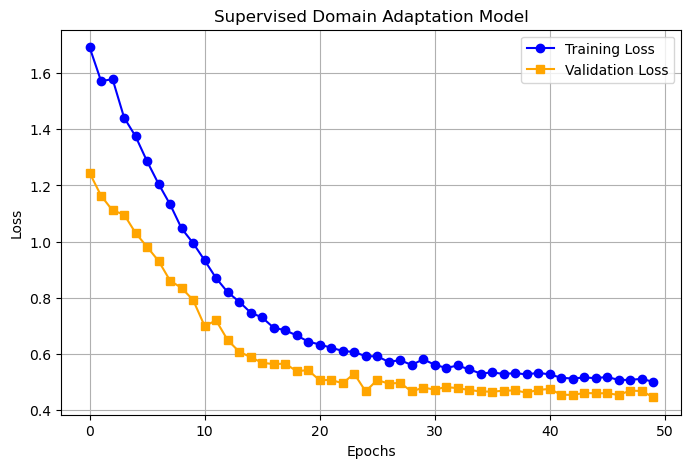

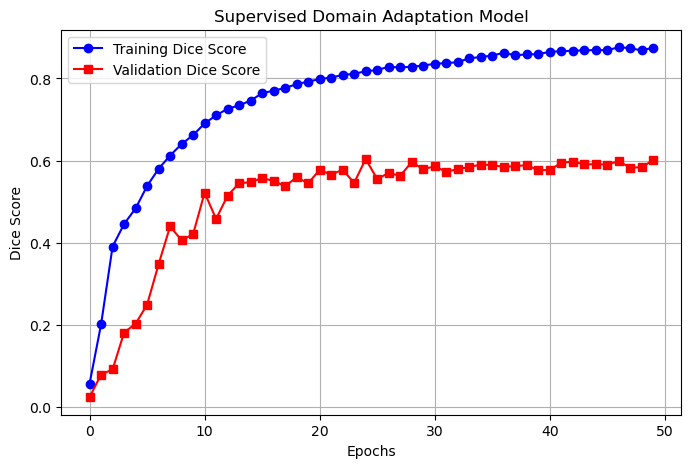

In [29]:
plotGraphs("Supervised Domain Adaptation Model").plot_losses(supervised_da_training_losses, supervised_da_validation_losses)
plotGraphs("Supervised Domain Adaptation Model").plot_metrics(supervised_da_train_dice_scores, supervised_da_valid_dice_scores)

In [30]:
domain_adaptation_model.eval()

total_val_loss = 0.0
total_dice_score = 0.0
total_lesion_accuracy = 0.0
num_samples = 0

with torch.no_grad():
    for images, masks, domain_labels in tqdm.tqdm(supervised_da_val_loader, desc="Evaluating Supervised DA Model"):
        images, masks, domain_labels = images.to(DEVICE), masks.to(DEVICE), domain_labels.to(DEVICE)

        segmentation_output, _ = domain_adaptation_model(images)

        loss = segmentation_criterion(segmentation_output, masks)
        total_val_loss += loss.item() * images.size(0)
        num_samples += images.size(0)

        preds = (torch.sigmoid(segmentation_output) > 0.5).float()

        masks_np = masks.cpu().numpy()
        preds_np = preds.cpu().numpy()

        for i in range(masks_np.shape[0]):
            total_dice_score += dice_score(masks_np[i, 0], preds_np[i, 0])
        for i in range(masks_np.shape[0]):
             total_lesion_accuracy += lesion_wise_accuracy(masks_np[i, 0], preds_np[i, 0])


average_dice_score = total_dice_score / num_samples
average_lesion_accuracy = total_lesion_accuracy / num_samples

print("\n" + "="*50)
print(f"Supervised Domain Adaptation Model Performance on Dataset 3 Test Set:")
print(f"Best Validation Dice Score: {max(supervised_da_valid_dice_scores):.4f}")
print(f"Best f1-score: {max(supervised_da_valid_dice_scores):.4f}")
print(f"Average Lesion-wise Accuracy (F1): {average_lesion_accuracy:.4f}")
print("="*50)

Evaluating Supervised DA Model: 100%|██████████| 13/13 [00:00<00:00, 65.01it/s]


Supervised Domain Adaptation Model Performance on Dataset 3 Test Set:
Best Validation Dice Score: 0.6041
Best f1-score: 0.6041
Average Lesion-wise Accuracy (F1): 0.4886


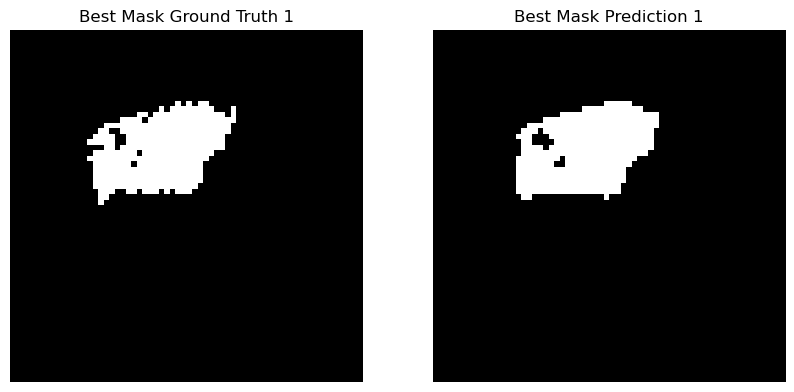

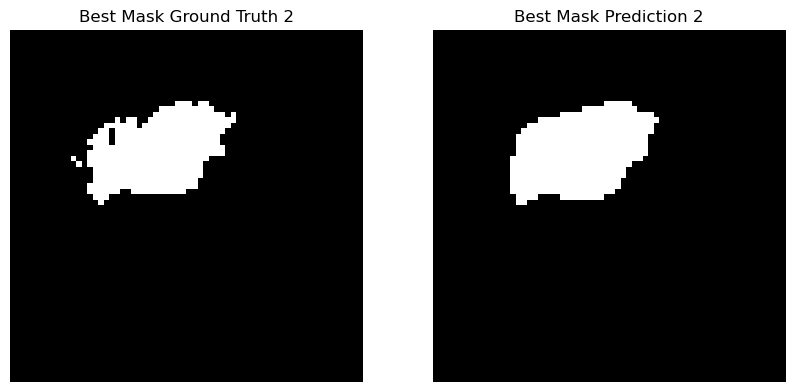

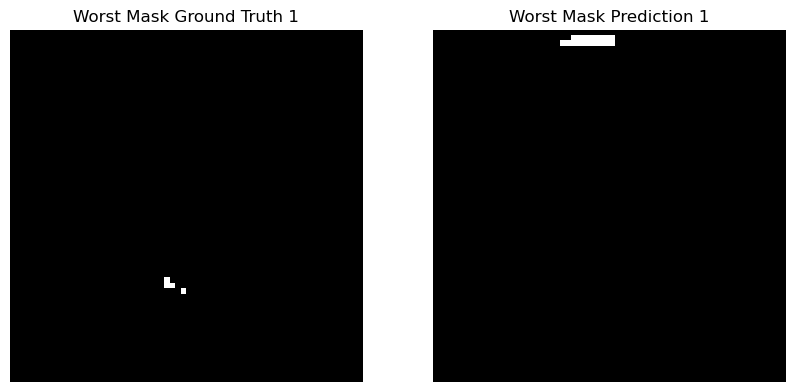

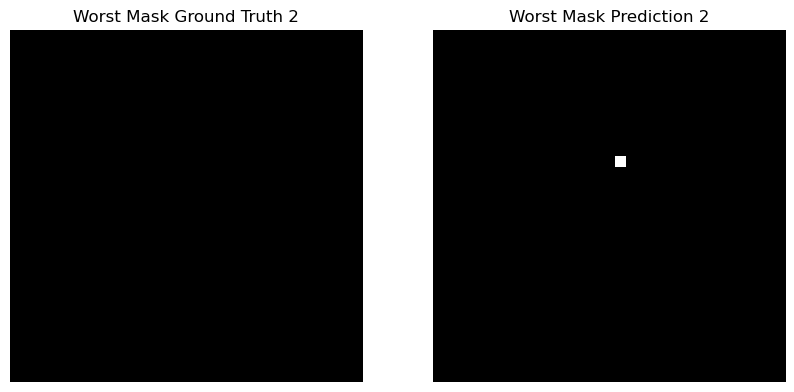

In [ ]:
plotSamples(domain_adaptation_model, supervised_da_val_loader, device='cuda', threshold=0.5, supervised=True).plot_samples()

### Unsepervised Domain Adaptation

In [36]:
def uda_trainer(model, source_loader, target_loader, val_loader, segmentation_criterion, 
                     domain_criterion, optimizer, device, num_epochs, domain_loss_weight=0.01, 
                     grl_schedule=True, grl_max=0.1, scheduler=None):
    
    best_val_loss = float("inf")
    patience = 0
    patience_counter = 15  # Increased patience for UDA

    model.to(device)
    training_logs = {
        'train_seg_loss': [], 'train_domain_loss': [], 'train_total_loss': [], 
        'train_dice': [], 'val_seg_loss': [], 'val_dice': []
    }

    len_src = len(source_loader)
    len_tgt = len(target_loader)
    max_steps_per_epoch = max(len_src, len_tgt)

    global_step = 0
    total_steps = num_epochs * max_steps_per_epoch

    for epoch in range(num_epochs):
        model.train()
        epoch_seg_loss = 0.0
        epoch_domain_loss = 0.0
        epoch_total_loss = 0.0
        epoch_dice = 0.0
        epoch_samples = 0

        src_iter = iter(source_loader)
        tgt_iter = iter(target_loader)

        for step in tqdm.tqdm(range(max_steps_per_epoch), desc=f"Epoch {epoch+1}/{num_epochs}"):
            # Get source batch
            try:
                src_batch = next(src_iter)
            except StopIteration:
                src_iter = iter(source_loader)
                src_batch = next(src_iter)

            # Get target batch
            try:
                tgt_batch = next(tgt_iter)
            except StopIteration:
                tgt_iter = iter(target_loader)
                tgt_batch = next(tgt_iter)

            # Extract data
            src_images, src_masks = src_batch[0], src_batch[1]
            tgt_images = tgt_batch[0] if isinstance(tgt_batch, (list, tuple)) else tgt_batch

            # Move to device
            src_images = src_images.to(device, dtype=torch.float32)
            src_masks = src_masks.to(device, dtype=torch.float32)
            tgt_images = tgt_images.to(device, dtype=torch.float32)

            batch_size_src = src_images.size(0)
            batch_size_tgt = tgt_images.size(0)

            # Update GRL lambda with gentler schedule
            if grl_schedule:
                p = float(global_step) / float(total_steps)
                # Much gentler schedule
                grl_lambda = grl_max * (2.0 / (1.0 + np.exp(-10.0 * p)) - 1.0) * 0.1
            else:
                grl_lambda = grl_max
            
            model.grl_lambda = grl_lambda

            optimizer.zero_grad()

            # Forward pass
            src_seg_logits, src_domain_logits = model(src_images)
            _, tgt_domain_logits = model(tgt_images)

            # Segmentation loss (only on source)
            seg_loss = segmentation_criterion(src_seg_logits, src_masks)

            # Domain loss
            domain_logits = torch.cat([src_domain_logits, tgt_domain_logits], dim=0)
            domain_labels_src = torch.zeros(batch_size_src, 1, device=device, dtype=torch.float32)
            domain_labels_tgt = torch.ones(batch_size_tgt, 1, device=device, dtype=torch.float32)
            domain_labels = torch.cat([domain_labels_src, domain_labels_tgt], dim=0)

            domain_loss = domain_criterion(domain_logits, domain_labels)

            # Total loss with adaptive weight
            adaptive_weight = min(domain_loss_weight * (epoch + 1) / 10, domain_loss_weight)
            total_loss = seg_loss + adaptive_weight * domain_loss

            # Backward pass
            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            # Update metrics
            epoch_seg_loss += seg_loss.item() * batch_size_src
            epoch_domain_loss += domain_loss.item() * (batch_size_src + batch_size_tgt)
            epoch_total_loss += total_loss.item() * batch_size_src
            epoch_samples += batch_size_src

            # Calculate dice on source
            with torch.no_grad():
                seg_probs = torch.sigmoid(src_seg_logits)
                seg_preds = (seg_probs > 0.5).float()
                
                # Handle dimensions properly
                if seg_preds.dim() == 4 and seg_preds.shape[1] == 1:
                    seg_preds_np = seg_preds.squeeze(1).cpu().numpy()
                    src_masks_np = src_masks.squeeze(1).cpu().numpy()
                else:
                    seg_preds_np = seg_preds.cpu().numpy()
                    src_masks_np = src_masks.cpu().numpy()
                
                batch_dice = dice_score(src_masks_np, seg_preds_np)
                epoch_dice += batch_dice

            global_step += 1

        # Calculate epoch averages
        epoch_seg_loss = epoch_seg_loss / epoch_samples
        epoch_domain_loss = epoch_domain_loss / (max_steps_per_epoch * (batch_size_src + batch_size_tgt))
        epoch_total_loss = epoch_total_loss / epoch_samples
        epoch_dice_mean = epoch_dice / max_steps_per_epoch

        training_logs['train_seg_loss'].append(epoch_seg_loss)
        training_logs['train_domain_loss'].append(epoch_domain_loss)
        training_logs['train_total_loss'].append(epoch_total_loss)
        training_logs['train_dice'].append(epoch_dice_mean)

        # Validation
        model.eval()
        val_seg_loss_acc = 0.0
        val_samples = 0
        val_dice_acc = 0.0
        
        with torch.no_grad():
            for v_images, v_masks, _ in val_loader:
                v_images = v_images.to(device, dtype=torch.float32)
                v_masks = v_masks.to(device, dtype=torch.float32)

                v_seg_logits, _ = model(v_images)
                v_seg_loss = segmentation_criterion(v_seg_logits, v_masks)
                val_seg_loss_acc += v_seg_loss.item() * v_images.size(0)
                val_samples += v_images.size(0)

                v_probs = torch.sigmoid(v_seg_logits)
                v_preds = (v_probs > 0.5).float()
                
                # Handle dimensions
                if v_preds.dim() == 4 and v_preds.shape[1] == 1:
                    v_preds_np = v_preds.squeeze(1).cpu().numpy()
                    v_masks_np = v_masks.squeeze(1).cpu().numpy()
                else:
                    v_preds_np = v_preds.cpu().numpy()
                    v_masks_np = v_masks.cpu().numpy()
                
                val_dice_batch = dice_score(v_masks_np, v_preds_np)
                val_dice_acc += val_dice_batch

        val_seg_loss = val_seg_loss_acc / val_samples
        val_dice = val_dice_acc / len(val_loader)

        training_logs['val_seg_loss'].append(val_seg_loss)
        training_logs['val_dice'].append(val_dice)

        # Early stopping
        if val_seg_loss < best_val_loss:
            best_val_loss = val_seg_loss
            patience = 0
        else:
            patience += 1
            if patience >= patience_counter:
                print("Early stopping triggered.")
                break

        # Learning rate scheduling
        if scheduler:
            scheduler.step(val_seg_loss)

        print("="*60)
        print(f"Train Seg Loss: {epoch_seg_loss:.4f}, Domain Loss: {epoch_domain_loss:.4f}")
        print(f"Total Loss: {epoch_total_loss:.4f}")
        print(f"Train Dice: {epoch_dice_mean:.4f} | Val Dice: {val_dice:.4f}")
        print(f"Val Seg Loss: {val_seg_loss:.4f}")
        print("="*60)

    return training_logs

In [37]:
model3 = smp.Unet(encoder_name="resnet34",encoder_weights="imagenet",in_channels=2,classes=1)
model3.to(DEVICE)
uda_model = DomainAdaptationModel(model3, grl_lambda=0.1)
uda_model.to(DEVICE)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
seg_crit = criterion
domain_crit = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.AdamW(uda_model.parameters(), lr=1e-4, weight_decay=1e-5)

In [38]:
target_images_only = TensorDataset(ds3_train)
target_loader = DataLoader(target_images_only, batch_size=32, shuffle=True)

In [40]:
logs = uda_trainer(uda_model, supervised_da_train_loader, target_loader, supervised_da_val_loader,
                    seg_crit, domain_crit, optimizer, DEVICE, num_epochs=50, 
                    domain_loss_weight=0.01, grl_schedule=True, grl_max=0.1, scheduler=scheduler)

Epoch 1/50: 100%|██████████| 77/77 [00:04<00:00, 17.69it/s]


Train Seg Loss: 1.1001, Domain Loss: 0.5943
Total Loss: 1.1006
Train Dice: 0.4443 | Val Dice: 0.1964
Val Seg Loss: 1.1009


Epoch 2/50: 100%|██████████| 77/77 [00:04<00:00, 17.70it/s]


Train Seg Loss: 1.0049, Domain Loss: 0.5120
Total Loss: 1.0058
Train Dice: 0.4982 | Val Dice: 0.2992
Val Seg Loss: 1.0410


Epoch 3/50: 100%|██████████| 77/77 [00:04<00:00, 17.76it/s]


Train Seg Loss: 0.9014, Domain Loss: 0.4604
Total Loss: 0.9025
Train Dice: 0.5810 | Val Dice: 0.4358
Val Seg Loss: 0.9359


Epoch 4/50: 100%|██████████| 77/77 [00:04<00:00, 17.68it/s]


Train Seg Loss: 0.7965, Domain Loss: 0.3908
Total Loss: 0.7979
Train Dice: 0.6356 | Val Dice: 0.4058
Val Seg Loss: 0.8749


Epoch 5/50: 100%|██████████| 77/77 [00:04<00:00, 18.43it/s]


Train Seg Loss: 0.6950, Domain Loss: 0.4089
Total Loss: 0.6967
Train Dice: 0.6703 | Val Dice: 0.5228
Val Seg Loss: 0.7723


Epoch 6/50: 100%|██████████| 77/77 [00:04<00:00, 18.38it/s]


Train Seg Loss: 0.6015, Domain Loss: 0.4419
Total Loss: 0.6038
Train Dice: 0.6959 | Val Dice: 0.5185
Val Seg Loss: 0.7316


Epoch 7/50: 100%|██████████| 77/77 [00:04<00:00, 17.52it/s]


Train Seg Loss: 0.5185, Domain Loss: 0.5035
Total Loss: 0.5215
Train Dice: 0.7261 | Val Dice: 0.4667
Val Seg Loss: 0.7070


Epoch 8/50: 100%|██████████| 77/77 [00:04<00:00, 17.62it/s]


Train Seg Loss: 0.4486, Domain Loss: 0.3890
Total Loss: 0.4512
Train Dice: 0.7410 | Val Dice: 0.5682
Val Seg Loss: 0.6042


Epoch 9/50: 100%|██████████| 77/77 [00:04<00:00, 17.51it/s]


Train Seg Loss: 0.3973, Domain Loss: 0.3745
Total Loss: 0.4002
Train Dice: 0.7551 | Val Dice: 0.5308
Val Seg Loss: 0.6027


Epoch 10/50: 100%|██████████| 77/77 [00:04<00:00, 18.60it/s]


Train Seg Loss: 0.3477, Domain Loss: 0.3463
Total Loss: 0.3506
Train Dice: 0.7743 | Val Dice: 0.5432
Val Seg Loss: 0.5778


Epoch 11/50: 100%|██████████| 77/77 [00:04<00:00, 18.67it/s]


Train Seg Loss: 0.3253, Domain Loss: 0.3364
Total Loss: 0.3281
Train Dice: 0.7787 | Val Dice: 0.5626
Val Seg Loss: 0.5437


Epoch 12/50: 100%|██████████| 77/77 [00:04<00:00, 18.88it/s]


Train Seg Loss: 0.2965, Domain Loss: 0.3061
Total Loss: 0.2991
Train Dice: 0.7909 | Val Dice: 0.5386
Val Seg Loss: 0.5550


Epoch 13/50: 100%|██████████| 77/77 [00:04<00:00, 18.29it/s]


Train Seg Loss: 0.2677, Domain Loss: 0.2813
Total Loss: 0.2701
Train Dice: 0.8074 | Val Dice: 0.5519
Val Seg Loss: 0.5341


Epoch 14/50: 100%|██████████| 77/77 [00:04<00:00, 17.63it/s]


Train Seg Loss: 0.2559, Domain Loss: 0.2807
Total Loss: 0.2583
Train Dice: 0.8116 | Val Dice: 0.5564
Val Seg Loss: 0.5243


Epoch 15/50: 100%|██████████| 77/77 [00:04<00:00, 17.29it/s]


Train Seg Loss: 0.2474, Domain Loss: 0.2307
Total Loss: 0.2493
Train Dice: 0.8130 | Val Dice: 0.5666
Val Seg Loss: 0.5082


Epoch 16/50: 100%|██████████| 77/77 [00:04<00:00, 17.03it/s]


Train Seg Loss: 0.2307, Domain Loss: 0.2427
Total Loss: 0.2328
Train Dice: 0.8242 | Val Dice: 0.5657
Val Seg Loss: 0.5050


Epoch 17/50: 100%|██████████| 77/77 [00:04<00:00, 17.43it/s]


Train Seg Loss: 0.2201, Domain Loss: 0.2383
Total Loss: 0.2221
Train Dice: 0.8295 | Val Dice: 0.5535
Val Seg Loss: 0.5118


Epoch 18/50: 100%|██████████| 77/77 [00:04<00:00, 17.40it/s]


Train Seg Loss: 0.2149, Domain Loss: 0.2464
Total Loss: 0.2170
Train Dice: 0.8313 | Val Dice: 0.5690
Val Seg Loss: 0.5027


Epoch 19/50: 100%|██████████| 77/77 [00:04<00:00, 16.98it/s]


Train Seg Loss: 0.2082, Domain Loss: 0.2141
Total Loss: 0.2100
Train Dice: 0.8355 | Val Dice: 0.6126
Val Seg Loss: 0.4510


Epoch 20/50: 100%|██████████| 77/77 [00:04<00:00, 17.53it/s]


Train Seg Loss: 0.2027, Domain Loss: 0.2409
Total Loss: 0.2048
Train Dice: 0.8387 | Val Dice: 0.6000
Val Seg Loss: 0.4601


Epoch 21/50: 100%|██████████| 77/77 [00:04<00:00, 17.72it/s]


Train Seg Loss: 0.2014, Domain Loss: 0.2457
Total Loss: 0.2035
Train Dice: 0.8384 | Val Dice: 0.5904
Val Seg Loss: 0.4712


Epoch 22/50: 100%|██████████| 77/77 [00:04<00:00, 17.65it/s]


Train Seg Loss: 0.1887, Domain Loss: 0.2271
Total Loss: 0.1906
Train Dice: 0.8491 | Val Dice: 0.5768
Val Seg Loss: 0.4848


Epoch 23/50: 100%|██████████| 77/77 [00:04<00:00, 17.99it/s]


Train Seg Loss: 0.1810, Domain Loss: 0.2124
Total Loss: 0.1828
Train Dice: 0.8552 | Val Dice: 0.5883
Val Seg Loss: 0.4686


Epoch 24/50: 100%|██████████| 77/77 [00:04<00:00, 18.46it/s]


Train Seg Loss: 0.1802, Domain Loss: 0.2402
Total Loss: 0.1822
Train Dice: 0.8553 | Val Dice: 0.5869
Val Seg Loss: 0.4687


Epoch 25/50: 100%|██████████| 77/77 [00:04<00:00, 17.84it/s]


Train Seg Loss: 0.1747, Domain Loss: 0.2068
Total Loss: 0.1765
Train Dice: 0.8589 | Val Dice: 0.5596
Val Seg Loss: 0.4991


Epoch 26/50: 100%|██████████| 77/77 [00:04<00:00, 17.57it/s]


Train Seg Loss: 0.1746, Domain Loss: 0.2322
Total Loss: 0.1766
Train Dice: 0.8581 | Val Dice: 0.5891
Val Seg Loss: 0.4643


Epoch 27/50: 100%|██████████| 77/77 [00:04<00:00, 17.21it/s]


Train Seg Loss: 0.1683, Domain Loss: 0.1944
Total Loss: 0.1699
Train Dice: 0.8635 | Val Dice: 0.6063
Val Seg Loss: 0.4458


Epoch 28/50: 100%|██████████| 77/77 [00:04<00:00, 17.48it/s]


Train Seg Loss: 0.1693, Domain Loss: 0.2136
Total Loss: 0.1711
Train Dice: 0.8618 | Val Dice: 0.5762
Val Seg Loss: 0.4753


Epoch 29/50: 100%|██████████| 77/77 [00:04<00:00, 17.86it/s]


Train Seg Loss: 0.1647, Domain Loss: 0.2291
Total Loss: 0.1666
Train Dice: 0.8652 | Val Dice: 0.5816
Val Seg Loss: 0.4687


Epoch 30/50: 100%|██████████| 77/77 [00:04<00:00, 17.97it/s]


Train Seg Loss: 0.1623, Domain Loss: 0.2283
Total Loss: 0.1643
Train Dice: 0.8671 | Val Dice: 0.6117
Val Seg Loss: 0.4354


Epoch 31/50: 100%|██████████| 77/77 [00:04<00:00, 18.12it/s]


Train Seg Loss: 0.1569, Domain Loss: 0.2620
Total Loss: 0.1591
Train Dice: 0.8716 | Val Dice: 0.5853
Val Seg Loss: 0.4666


Epoch 32/50: 100%|██████████| 77/77 [00:04<00:00, 18.07it/s]


Train Seg Loss: 0.1550, Domain Loss: 0.2286
Total Loss: 0.1569
Train Dice: 0.8732 | Val Dice: 0.5870
Val Seg Loss: 0.4660


Epoch 33/50: 100%|██████████| 77/77 [00:04<00:00, 17.48it/s]


Train Seg Loss: 0.1500, Domain Loss: 0.2267
Total Loss: 0.1519
Train Dice: 0.8775 | Val Dice: 0.5719
Val Seg Loss: 0.4829


Epoch 34/50: 100%|██████████| 77/77 [00:04<00:00, 17.50it/s]


Train Seg Loss: 0.1456, Domain Loss: 0.2109
Total Loss: 0.1474
Train Dice: 0.8811 | Val Dice: 0.6147
Val Seg Loss: 0.4362


Epoch 35/50: 100%|██████████| 77/77 [00:04<00:00, 17.61it/s]


Train Seg Loss: 0.1489, Domain Loss: 0.2586
Total Loss: 0.1511
Train Dice: 0.8784 | Val Dice: 0.5431
Val Seg Loss: 0.5160


Epoch 36/50: 100%|██████████| 77/77 [00:04<00:00, 17.49it/s]


Train Seg Loss: 0.1479, Domain Loss: 0.2482
Total Loss: 0.1500
Train Dice: 0.8788 | Val Dice: 0.5811
Val Seg Loss: 0.4727


Epoch 37/50: 100%|██████████| 77/77 [00:04<00:00, 17.57it/s]


Train Seg Loss: 0.1607, Domain Loss: 0.2575
Total Loss: 0.1629
Train Dice: 0.8670 | Val Dice: 0.5558
Val Seg Loss: 0.5029


Epoch 38/50: 100%|██████████| 77/77 [00:04<00:00, 17.66it/s]


Train Seg Loss: 0.1439, Domain Loss: 0.2517
Total Loss: 0.1460
Train Dice: 0.8819 | Val Dice: 0.5166
Val Seg Loss: 0.5477


Epoch 39/50: 100%|██████████| 77/77 [00:04<00:00, 17.43it/s]


Train Seg Loss: 0.1429, Domain Loss: 0.2385
Total Loss: 0.1449
Train Dice: 0.8823 | Val Dice: 0.5330
Val Seg Loss: 0.5258


Epoch 40/50: 100%|██████████| 77/77 [00:04<00:00, 17.75it/s]


Train Seg Loss: 0.1414, Domain Loss: 0.2490
Total Loss: 0.1435
Train Dice: 0.8835 | Val Dice: 0.5877
Val Seg Loss: 0.4607


Epoch 41/50: 100%|██████████| 77/77 [00:04<00:00, 18.12it/s]


Train Seg Loss: 0.1285, Domain Loss: 0.2403
Total Loss: 0.1306
Train Dice: 0.8951 | Val Dice: 0.5684
Val Seg Loss: 0.4865


Epoch 42/50: 100%|██████████| 77/77 [00:04<00:00, 18.19it/s]


Train Seg Loss: 0.1321, Domain Loss: 0.2242
Total Loss: 0.1340
Train Dice: 0.8919 | Val Dice: 0.5845
Val Seg Loss: 0.4722


Epoch 43/50: 100%|██████████| 77/77 [00:04<00:00, 18.34it/s]


Train Seg Loss: 0.1302, Domain Loss: 0.2319
Total Loss: 0.1322
Train Dice: 0.8930 | Val Dice: 0.5605
Val Seg Loss: 0.4931


Epoch 44/50: 100%|██████████| 77/77 [00:04<00:00, 17.78it/s]


Train Seg Loss: 0.1288, Domain Loss: 0.2747
Total Loss: 0.1312
Train Dice: 0.8941 | Val Dice: 0.5481
Val Seg Loss: 0.5096


Epoch 45/50: 100%|██████████| 77/77 [00:04<00:00, 18.15it/s]


Early stopping triggered.


In [ ]:
torch.save(uda_model.state_dict(), 'uda_model.pth')

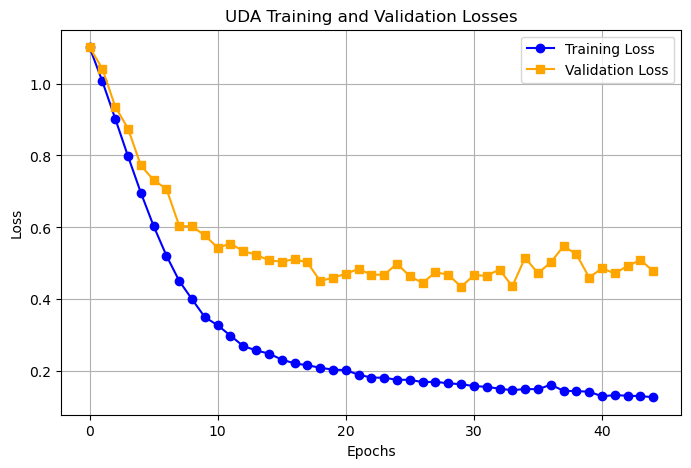

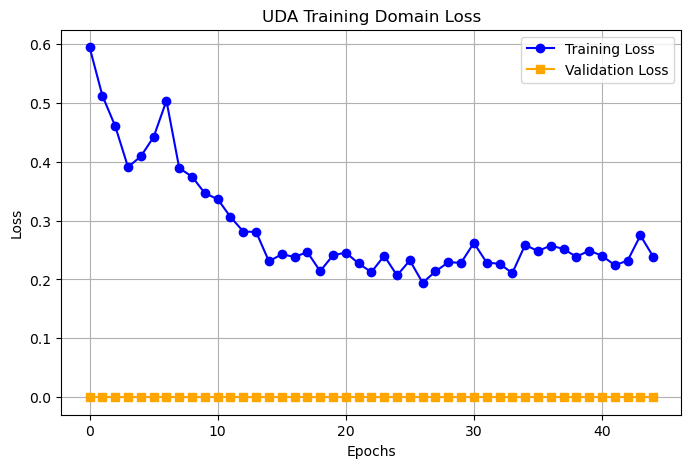

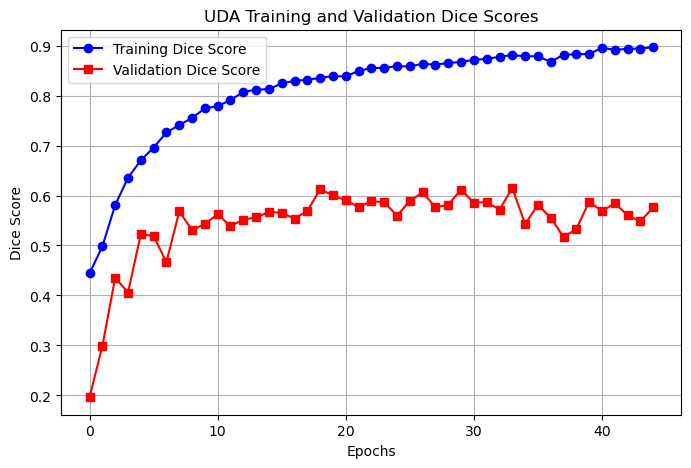

In [42]:
plotGraphs('UDA Training and Validation Losses').plot_losses(logs['train_total_loss'], logs['val_seg_loss'])
plotGraphs('UDA Training Domain Loss').plot_losses(logs['train_domain_loss'], [0]*len(logs['val_seg_loss']))
plotGraphs('UDA Training and Validation Dice Scores').plot_metrics(logs['train_dice'], logs['val_dice'])

In [43]:
# Evaluate the UDA model on the validation set
uda_model.eval()
total_dice = 0
num_batches = 0
lwa = []
with torch.no_grad():
    for images, labels, _ in supervised_da_val_loader:  
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        seg_outputs, _ = uda_model(images)  
        
        seg_probs = torch.sigmoid(seg_outputs)
        seg_preds = (seg_probs > 0.5).float()
        
        labels_np = labels.squeeze(1).cpu().numpy() 
        seg_preds_np = seg_preds.squeeze(1).cpu().numpy() 
        
        batch_dice = 0
        batch_lesion_accuracy = 0
        batch_size = labels_np.shape[0]
        
        for i in range(batch_size):
            sample_dice = dice_score(labels_np[i], seg_preds_np[i])
            sample_lesion_acc = lesion_wise_accuracy(labels_np[i], seg_preds_np[i])
            batch_dice += sample_dice
            batch_lesion_accuracy += sample_lesion_acc
        
        batch_dice /= batch_size
        batch_lesion_accuracy /= batch_size
        
        total_dice += batch_dice
        num_batches += 1
        
        print(f"Batch {num_batches} Dice Score: {batch_dice:.4f}")
        lwa.append(round(batch_lesion_accuracy, 4))


avg_dice = total_dice / num_batches
print(f"Average Validation Dice Score: {avg_dice:.4f}")

Batch 1 Dice Score: 0.4911
Batch 2 Dice Score: 0.3440
Batch 3 Dice Score: 0.4278
Batch 4 Dice Score: 0.4731
Batch 5 Dice Score: 0.6393
Batch 6 Dice Score: 0.5104
Batch 7 Dice Score: 0.4574
Batch 8 Dice Score: 0.5534
Batch 9 Dice Score: 0.4533
Batch 10 Dice Score: 0.3232
Batch 11 Dice Score: 0.5645
Batch 12 Dice Score: 0.4663
Batch 13 Dice Score: 0.6613
Average Validation Dice Score: 0.4896


In [44]:
print(f"Best Validation Dice Score: {max(logs['val_dice']):.4f}")
print(f"Best validation lesion wise accuracy {max(lwa)}")

Best Validation Dice Score: 0.6147
Best validation lesion wise accuracy 0.5813


In [47]:
def get_items_uda(model, val_loader, device, threshold):
    val_images = val_loader.dataset.tensors[0].numpy()  # Images
    test_masks = val_loader.dataset.tensors[1].numpy()  # Ground truth masks
    
    outputs, labels = evaluate(model, val_loader, device=device, threshold=threshold, supervised=True)
    outputs = outputs.squeeze(1).numpy()
    labels = labels.squeeze(1).numpy()
    
    dice_scores = [dice_score(labels[i], outputs[i]) for i in range(len(labels))]
    sorted_indices = np.argsort(dice_scores)
    
    best_dice_scores = [(dice_scores[i], i) for i in sorted_indices if dice_scores[i] != 1.0]
    worst_dice_scores = [(dice_scores[i], i) for i in sorted_indices]
    
    if len(best_dice_scores) >= 2:
        best_indices = [idx for score, idx in best_dice_scores[-2:]]
    else:
        best_indices = [idx for score, idx in sorted_indices[-2:]]
    
    worst_indices = [idx for score, idx in worst_dice_scores[:2]]
    
    two_best_masks_ground_truth = test_masks[best_indices]
    two_worst_masks_ground_truth = test_masks[worst_indices]
    two_best_masks_predictions = outputs[best_indices]
    two_worst_masks_predictions = outputs[worst_indices]
    
    return two_best_masks_ground_truth, two_best_masks_predictions, two_worst_masks_ground_truth, two_worst_masks_predictions

In [48]:
two_best_gt, two_best_pred, two_worst_gt, two_worst_pred = get_items_uda(uda_model, supervised_da_val_loader, device='cuda', threshold=0.5)

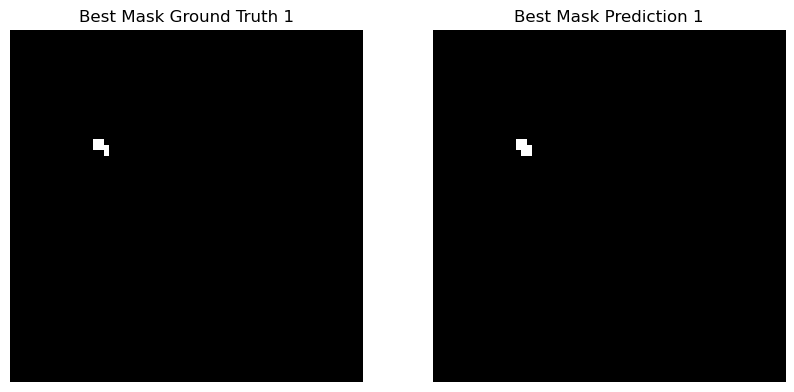

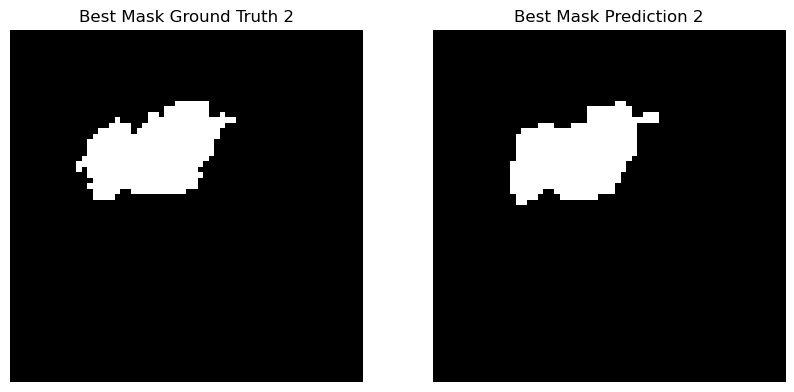

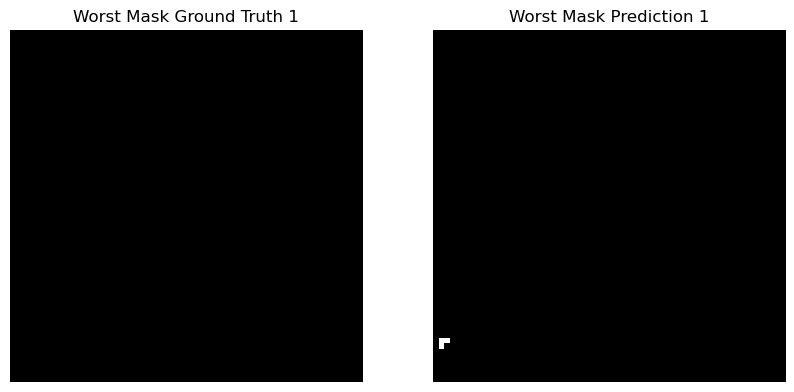

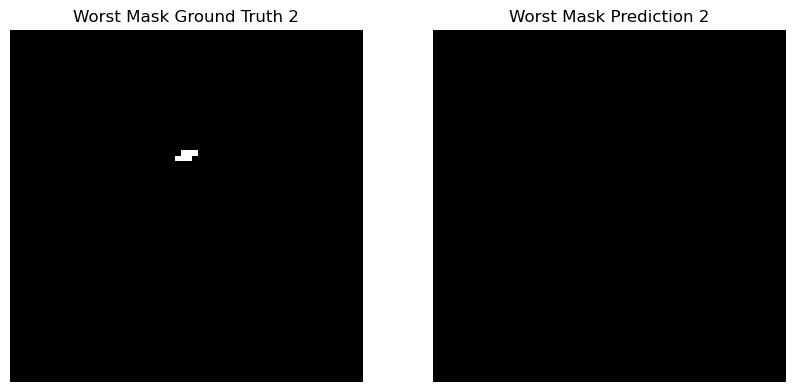

In [49]:
#Plot best and worst samples
for i in range(min(2, len(two_best_gt))):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    if len(two_best_gt[i].shape) == 3:
        plt.imshow(two_best_gt[i][0], cmap='gray')
    else:
        plt.imshow(two_best_gt[i], cmap='gray')
    plt.title(f'Best Mask Ground Truth {i+1}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(two_best_pred[i], cmap='gray')
    plt.title(f'Best Mask Prediction {i+1}')
    plt.axis('off')
    plt.show()
for i in range(min(2, len(two_worst_gt))):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    if len(two_worst_gt[i].shape) == 3:
        plt.imshow(two_worst_gt[i][0], cmap='gray')
    else:
        plt.imshow(two_worst_gt[i], cmap='gray')
    plt.title(f'Worst Mask Ground Truth {i+1}')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(two_worst_pred[i], cmap='gray')
    plt.title(f'Worst Mask Prediction {i+1}')
    plt.axis('off') 
    plt.show()